In [1]:
import pandas as pd

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

y.index = y.name
y = pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:, :]
y.index = pd.to_datetime(y.index)

# check if NAs are no dividend period
y = y.sort_index().fillna(0.)

y = y.loc["2004-03-31":]

y

,BasicEPS
2004-03-31,0.002
2004-06-30,0.003
2004-09-30,0.0
2004-12-31,0.013
2005-03-31,0.013
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [3]:
!pip install pytrends

zsh:1: /Users/elena/Library/Python/3.8/bin/pip: bad interpreter: /Library/Developer/CommandLineTools/usr/bin/python3: no such file or directory


In [4]:
from pytrends.request import TrendReq

In [73]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
# keywords = ["iPhone", "Recession", "Samsung", "Interest Rates", "Phone Repair", "Buy iPhone", "Sell iPhone", "New Phone"]
keywords = ["iPhone", "IOS", "Apple", "Mac", "Operating System", "App", "Water", "Banana", "Jump"]

start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [74]:
df = df.resample("Q").mean()
df = df.loc[:"2023-09-30"]
df

,iPhone,IOS,Apple,Mac,Operating System,App,Water,Banana,Jump
date,,,,,,,,,
2004-03-31,0.000000,1.000000,19.666667,70.333333,98.666667,1.666667,59.666667,36.333333,47.000000
2004-06-30,0.000000,1.666667,19.333333,68.333333,85.333333,2.000000,68.333333,40.666667,44.666667
2004-09-30,0.000000,1.333333,22.000000,64.666667,87.333333,1.333333,67.000000,38.666667,47.333333
2004-12-31,0.000000,1.000000,24.333333,71.666667,78.666667,2.000000,59.333333,46.333333,48.000000
2005-03-31,0.000000,1.000000,27.333333,72.000000,76.000000,1.666667,68.000000,41.666667,49.333333
...,...,...,...,...,...,...,...,...,...
2022-09-30,52.000000,20.333333,49.666667,39.666667,38.333333,80.666667,90.333333,66.000000,44.666667
2022-12-31,49.333333,16.000000,51.000000,43.000000,39.000000,77.333333,80.666667,60.666667,43.666667
2023-03-31,50.000000,14.000000,45.666667,41.666667,38.000000,81.333333,95.333333,69.000000,46.333333


# 2.) Normalize all the X data

In [31]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
X_scaled = scaler.fit_transform(df)

/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


# 3.) Import data. Train, Test, Holdout (80%,15%,5%)

In [34]:
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
# X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size = 0.25, random_state = 42) 

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [36]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

In [90]:
lasso = Lasso(alpha = .5)

In [91]:
lasso.fit(X_scaled, y)

/Users/elena/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Lasso(alpha=0.5)

In [88]:
coefficients = lasso.coef_
intercept = lasso.intercept_

print(coefficients)
# coefficients = np.append(intercept, coefficients)
# print(coefficients)

[ 0.          0.          0.         -0.         -0.          0.03789776
  0.          0.         -0.        ]


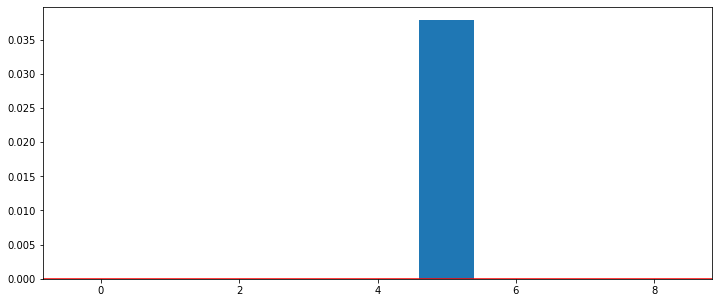

In [89]:
plt.figure(figsize = (12,5))
categories = ["iPhone", "IOS", "Apple", "Mac", "Operating System", "App", "Water", "Banana", "Jump"]
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

In [ ]:
# Only "App" has a non-zero coefficient of +0.038, while other predictors' coefficients all shrink to 0.
# The coefficient magnitude shows that "App" has a positive relationship with Apple's EPS, which makes sense 
    # because Apple obtain a lot of its earnings from App Store and Apple's ecosystem is supported by Apple's apps.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?